Predicting Salaries with Decision Trees
=======================================


Import libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree


In [59]:
attribute_names = (
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'salary-class',
)


Read a CSV data file.

In [60]:
df = pd.read_csv('adult.data',names = attribute_names,sep =',',engine ='python')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Pre-process the data.  First, remove unwanted variables.

In [61]:
excludes = (
    'fnlwgt',
    'education-num',
    'capital-gain',
    'capital-loss'
)
for att in excludes:
    del df[att]
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


Boolean variables to 0s and 1s.

In [63]:
booleans = (
    'sex',
    'native-country',
    'salary-class'
)
for att in  booleans:
    df[att]=df[att].astype('category')
    df[att]=df[att].cat.codes
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,40,39,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,13,39,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,40,39,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,39,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,5,0


 One-hot encoding of all categorical attributes.

In [64]:
categoricals = (
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race'

)
for att in categoricals:
    df=pd.concat([df,pd.get_dummies(df[att], prefix =att)],axis =1)
    del df[att]
df.head()

,age,sex,hours-per-week,native-country,salary-class,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,1,40,39,0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,50,1,13,39,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,38,1,40,39,0,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
3,53,1,40,39,0,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,28,0,40,5,0,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False


Extract attributes (X) and class labels (y).

In [65]:
y= df['salary-class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: salary-class, dtype: int8

In [67]:
X=df.copy()
X=X.drop(columns='salary-class')
X.head()

,age,sex,hours-per-week,native-country,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,1,40,39,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,50,1,13,39,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,38,1,40,39,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
3,53,1,40,39,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,28,0,40,5,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False


Split dataset into training and testing subsets.

In [68]:
X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size =0.33,
    random_state =0
)
print('X_train',X_train.shape)

X_train (21815, 62)


Construct a decision tree from this training data.

In [69]:
clf = DecisionTreeClassifier(
    random_state =0,
    criterion='entropy'
)


In [70]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predict target class for the training set.

In [72]:
y_train_pred=clf.predict(X_train)
print(y_train_pred[0:10])
train_accuracy = accuracy_score(y_train,y_train_pred)
print('Training accuracy:',train_accuracy)

[0 1 0 0 0 0 0 0 1 0]
Training accuracy: 0.9731377492550997


Predict target class for the testing set.

In [73]:
y_test_pred=clf.predict(X_test)
print(y_test_pred[0:10])
test_accuracy = accuracy_score(y_test,y_test_pred)
print('Testing accuracy:',test_accuracy)

[0 0 0 1 0 0 0 0 0 0]
Testing accuracy: 0.7787083565978038


Check if dataset is balanced.

In [74]:
df['salary-class'].value_counts()

salary-class
0    24720
1     7841
Name: count, dtype: int64

Prune the decision tree.

Minimum sample split = 2
Training accuracy: 0.9731377492550997
Testing accuracy: 0.7787083565978038
Minimum sample split = 3
Training accuracy: 0.9588815035526014
Testing accuracy: 0.7846640610459706
Minimum sample split = 5
Training accuracy: 0.9442126976850791
Testing accuracy: 0.7877349711520566
Minimum sample split = 10
Training accuracy: 0.918771487508595
Testing accuracy: 0.7944351386562442
Minimum sample split = 20
Training accuracy: 0.893651157460463
Testing accuracy: 0.8078354736646194
Minimum sample split = 50
Training accuracy: 0.8680724272289709
Testing accuracy: 0.8153731621068304
Minimum sample split = 100
Training accuracy: 0.856429062571625
Testing accuracy: 0.8237483714870649
Minimum sample split = 250
Training accuracy: 0.8407059362823746
Testing accuracy: 0.8238414293690676
Minimum sample split = 500
Training accuracy: 0.8343800137520055
Testing accuracy: 0.8238414293690676
Minimum sample split = 750
Training accuracy: 0.8323630529452212
Testing accuracy: 0.824865066

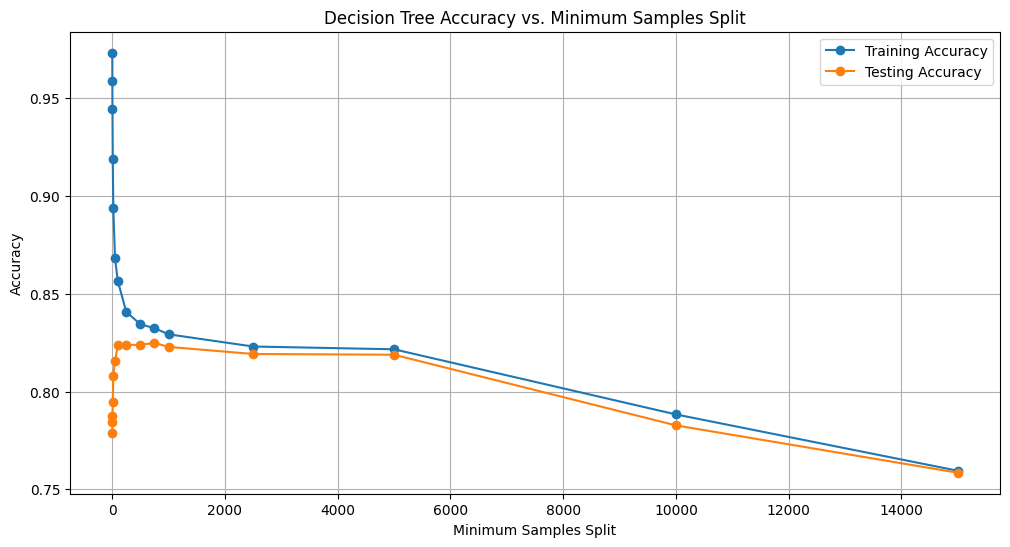

In [88]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, and y_test are already defined

sizes = [2, 3, 5, 10, 20, 50, 100, 250, 500, 750, 1000, 2500, 5000, 10000, 15000]
train_accs = []
test_accs = []

for s in sizes:
    clf = DecisionTreeClassifier(random_state=0, criterion='entropy', min_samples_split=s)
    clf.fit(X_train, y_train)

    print("Minimum sample split =", s)

    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print('Training accuracy:', train_accuracy)

    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print('Testing accuracy:', test_accuracy)

    train_accs.append(train_accuracy)
    test_accs.append(test_accuracy)

plt.figure(figsize=(12, 6))
plt.plot(sizes, train_accs, label='Training Accuracy', marker='o')
plt.plot(sizes, test_accs, label='Testing Accuracy', marker='o')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Minimum Samples Split')
plt.legend()
plt.grid(True)
plt.show()


Graphical representation of a decision tree.

In [92]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [ ]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', min_samples_split=2)
clf.fit(X_train, y_train)
fig=plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=X_train.columns,
                   class_names=True,
                   filled=True)


fig.savefig('tree.png')

